In [1]:
from numba import jit, njit
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import random
from modula import *
plt.style.use(['science', 'grid', 'notebook'])

### Weighted die

In [2]:
num_simulation = int(1e6)
result_mcmc = weighted_die(num_simulation)
result_python = weighted_die_direct_sampling(num_simulation)

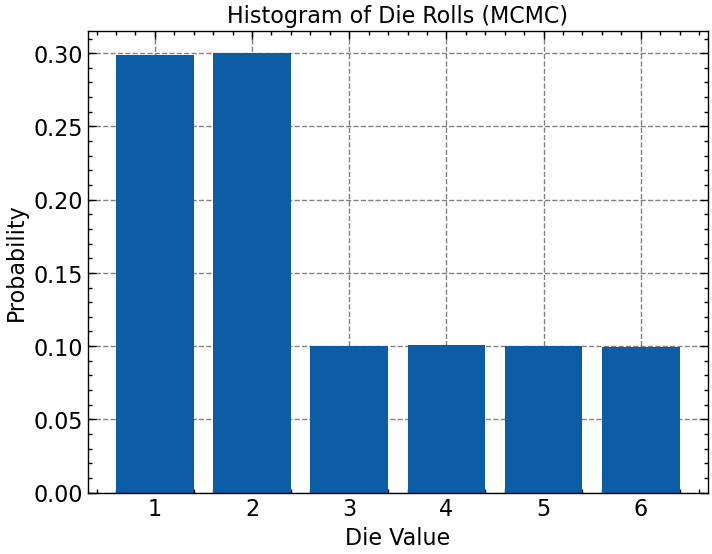

In [3]:
# Set bins to explicitly represent each die value from 1 to 6
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]  # Setting bins between the integers
plt.hist(result_mcmc, bins=bins, density=True, rwidth=0.8)
plt.xticks(range(1, 7)) 
plt.xlabel('Die Value')
plt.ylabel('Probability')
plt.title('Histogram of Die Rolls (MCMC)')
plt.show()

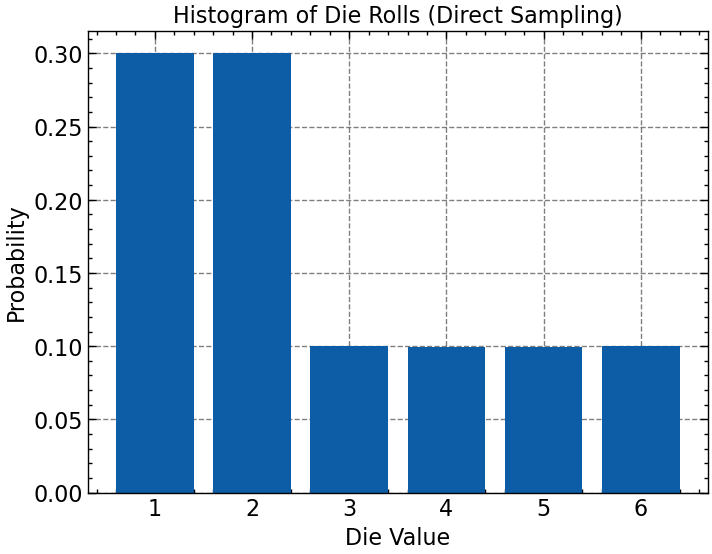

In [4]:
plt.hist(result_python, bins=bins, density=True, rwidth=0.8)
plt.xticks(range(1, 7))  # Set x-ticks to be centered on each integer
plt.xlabel('Die Value')
plt.ylabel('Probability')
plt.title('Histogram of Die Rolls (Direct Sampling)')
plt.show()

### plotting time series' of intensive quantities

- Choose system sizes $L = 16, 32$ and a temperature of your choosing not to close to the critical temperature, and run the simulation.  Plot $U$ and $M$ as functions of $t$, the update step per site defined above.  
- Roughly how long does it seem to take for the simulation to converge?  
- Does the time it takes seem to depend on the system size?

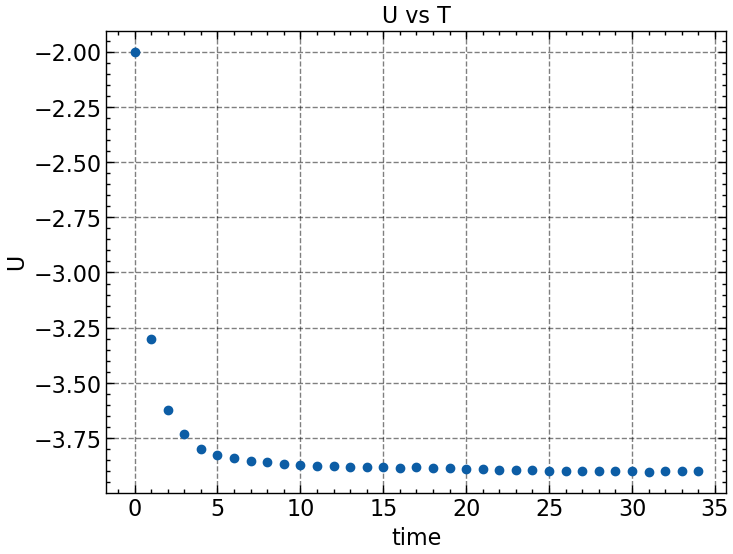

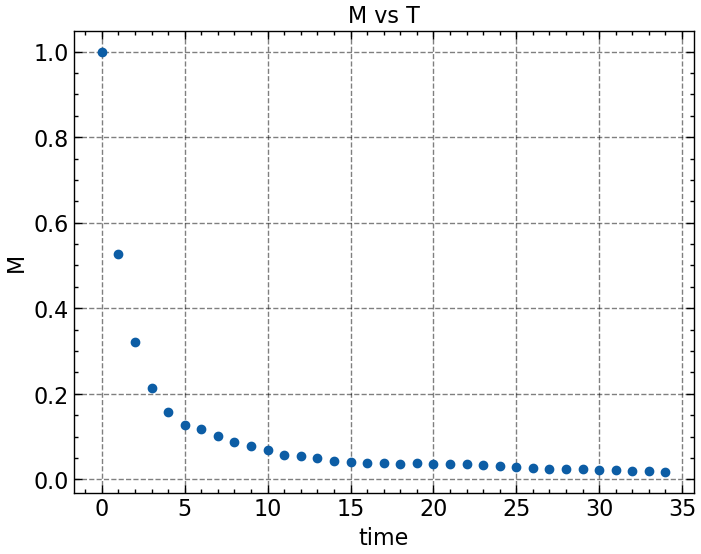

In [5]:
arr, E, S = two_dim_ising(L = 32, temp = 25, num_steps = int(1e6))  
U = U_series(E, int(1e6), 32)
M = M_series(S, int(1e6), 32)
points = U.size // 30
step = U.size // 32**2
arr = U[:points:step]
x = arr.size
x = np.arange(x)

plt.figure()
plt.plot(x, U[:points:step],'o')
plt.xlabel('time')
plt.ylabel('U')
plt.title(f'U vs T')
plt.show()

plt.figure()
plt.plot(x, M[:points:step],'o')
plt.xlabel('time')
plt.ylabel('M')
plt.title(f'M vs T')
plt.show()

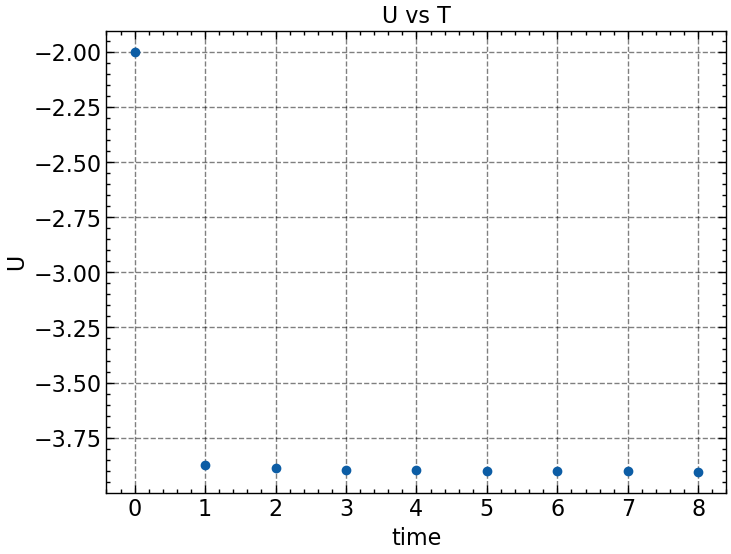

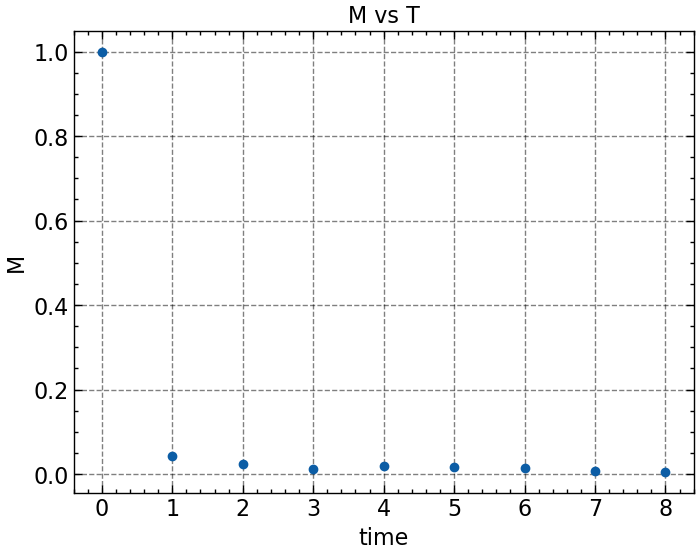

In [6]:
arr, E, S = two_dim_ising(L = 16, temp = 25, num_steps = int(1e6))  
U = U_series(E, int(1e6), 16)
M = M_series(S, int(1e6), 16)
points = U.size // 30
step = U.size // 16**2
arr = U[:points:step]
x = arr.size
x = np.arange(x)

plt.figure()
plt.plot(x, U[:points:step],'o')
plt.xlabel('time')
plt.ylabel('U')
plt.title(f'U vs T')
plt.show()

plt.figure()
plt.plot(x, M[:points:step],'o')
plt.xlabel('time')
plt.ylabel('M')
plt.title(f'M vs T')
plt.show()

It is very clear that it takes larger system longer to converge from both the U and M plot. For $L = 16$, it takes about 1 to 2 t step to converge. For $L = 32$, it takes more than 10 t step to converge.

### Magnetization curves for different lattice sizes

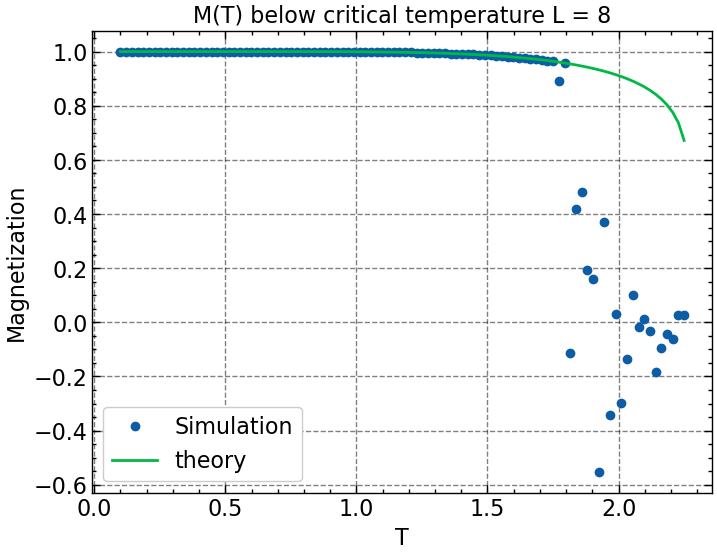

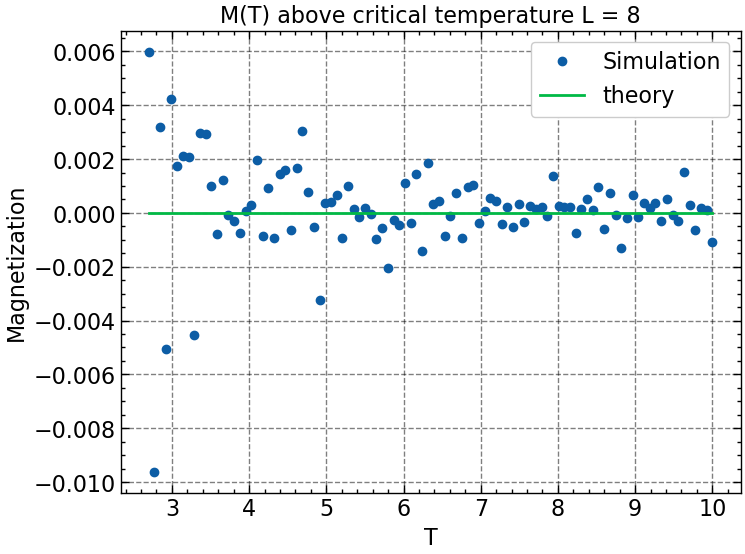

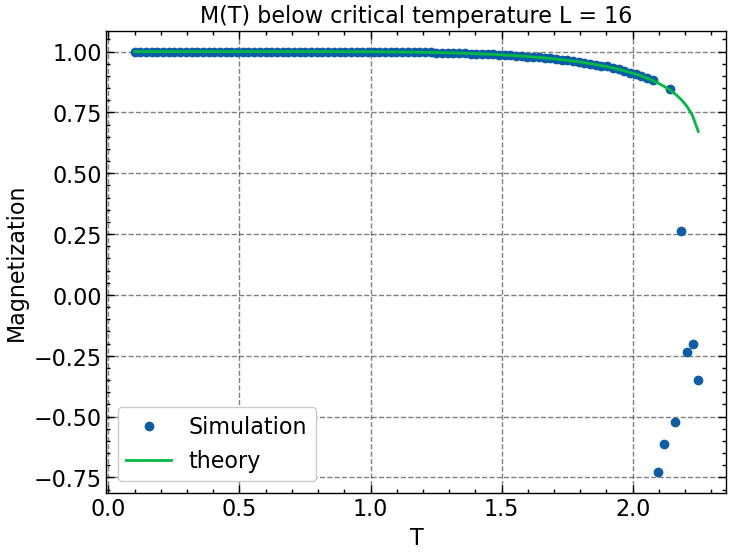

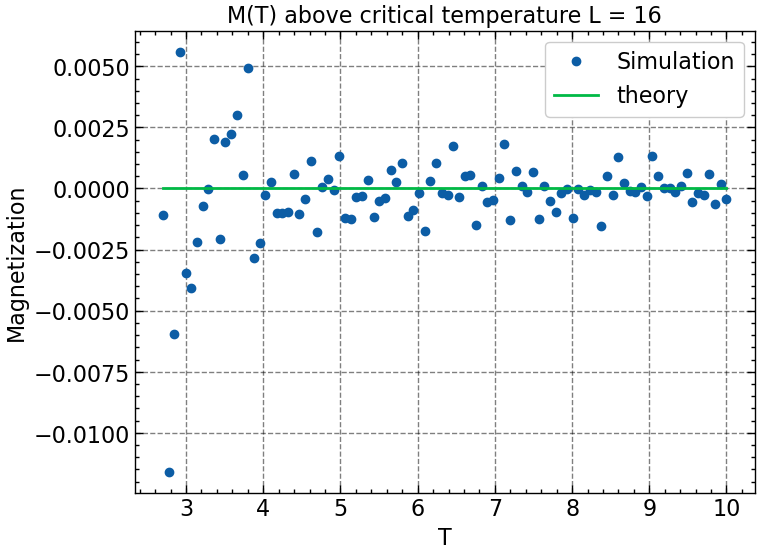

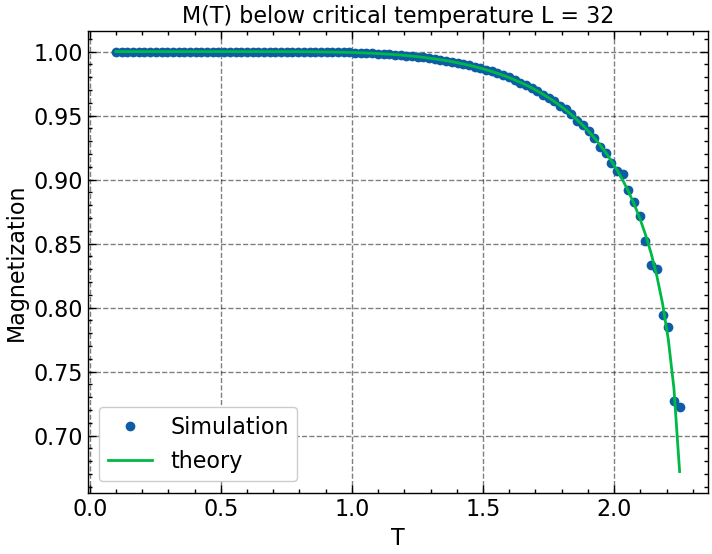

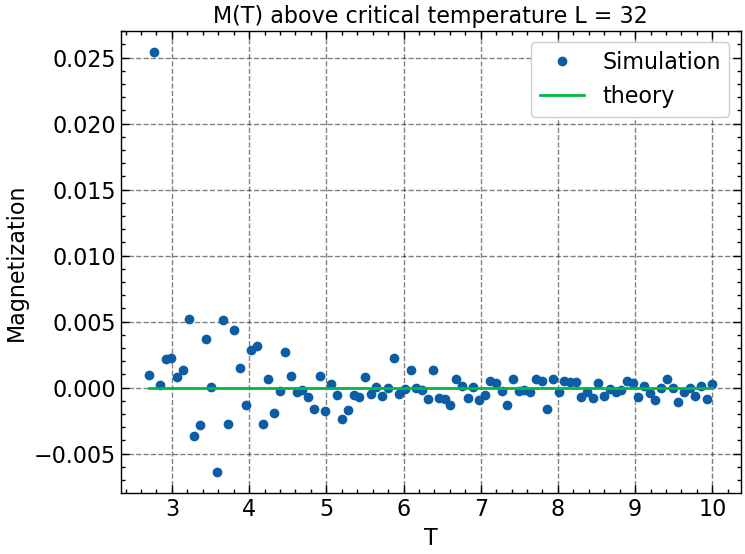

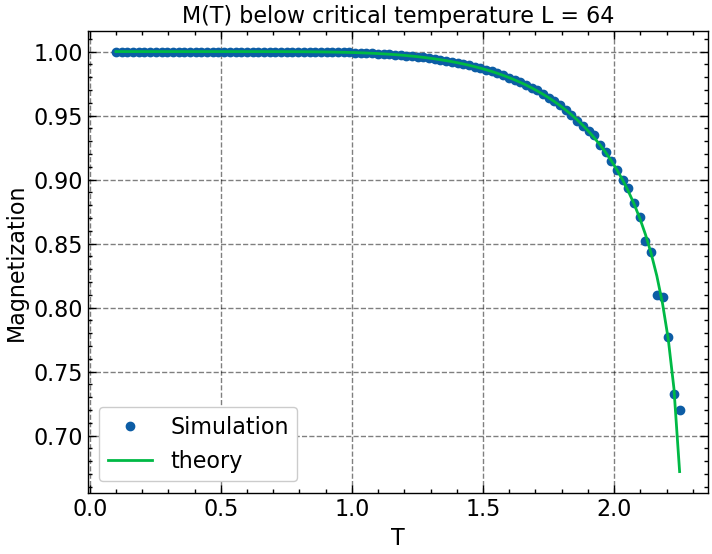

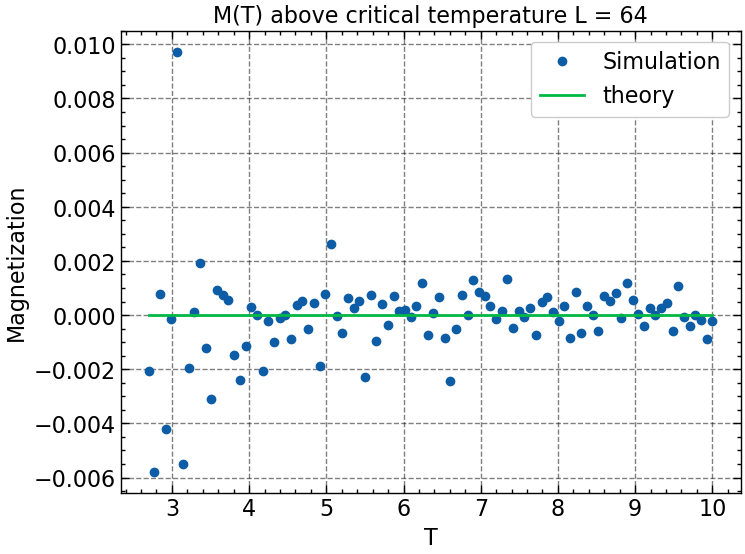

In [7]:
Magnetization(L_arr = [8, 16, 32, 64])

When L is small, the simulation is not very accurate. However, as L increases, the simulation aligns better with the theory. 

### Typical spin configuration at different temperatures

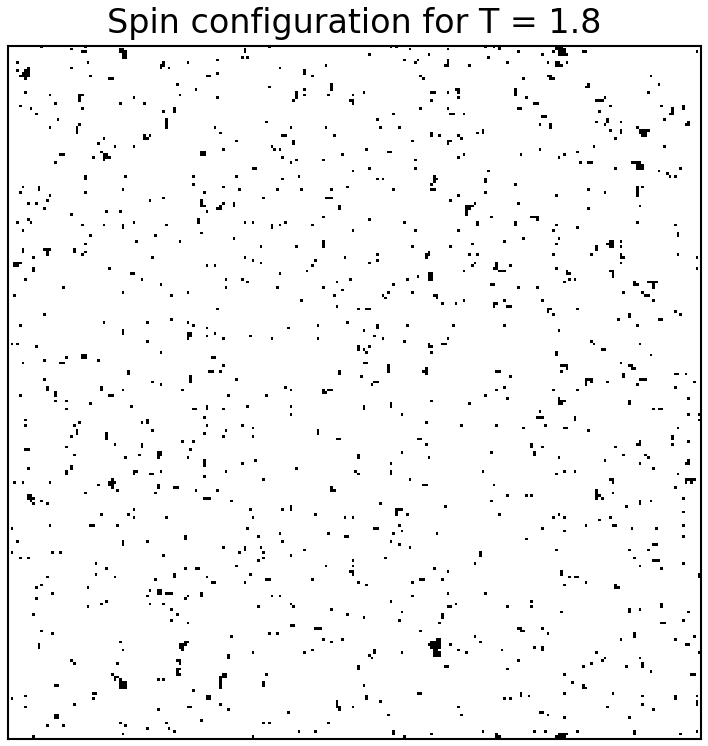

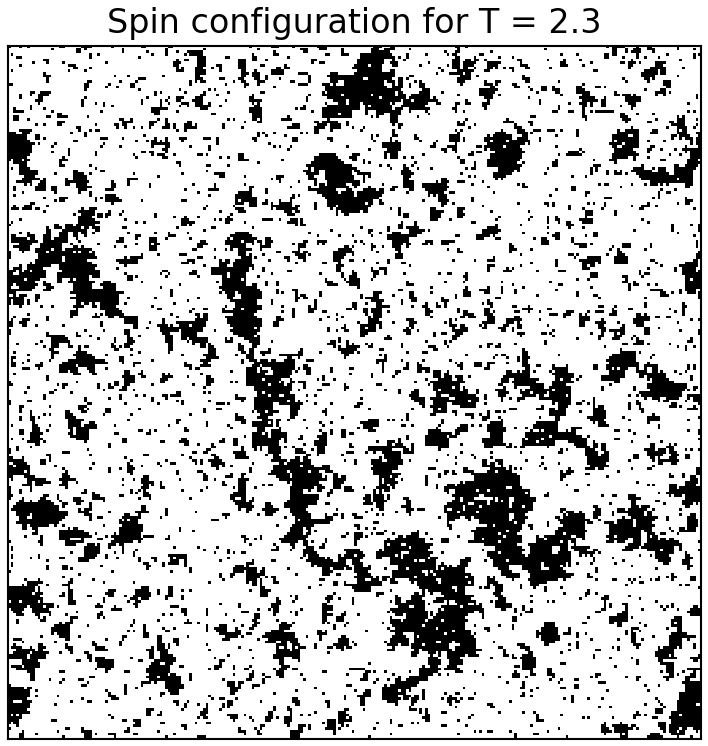

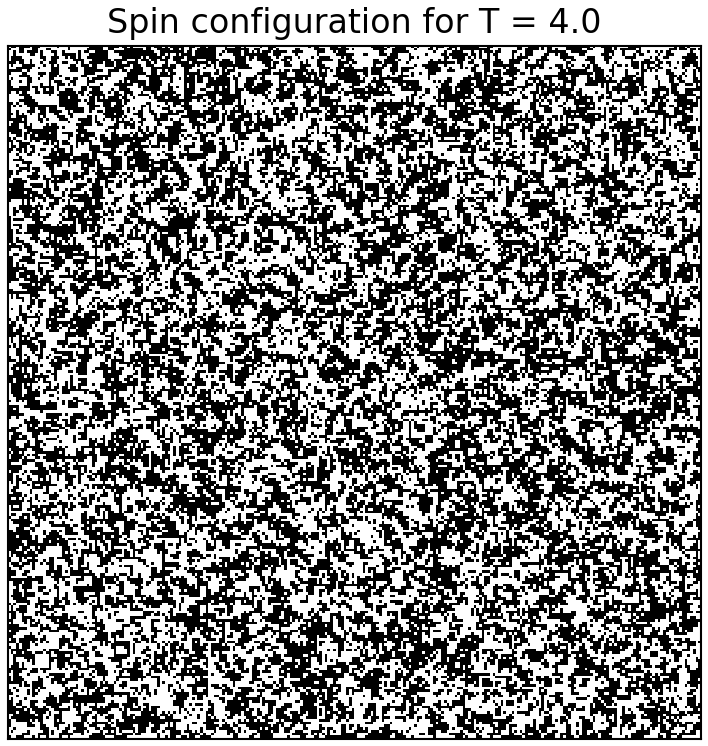

In [8]:
plot_configuration(temp_arr=[1.8, 2.3, 4.0])

- Comment on how the patterns differ at different temperatures and what they might physically tell us about how the system behaves at temperatures below, near, and above the critical temperature.

At 1.8K, we are seeing mostly -1 spins for the lattice site. At 2.3K, we are still observing more -1 spin than + 1 spin, but we are seeing some lumps of +1 spin, which indicates that we are getting closer to equilibrium. At 4.0K, it's mostly random and there's no real pattern to be observed (the spins has no means of orientation).